In [1]:
import os

import numpy as np
import pandas as pd

from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append("/kaggle/src/")

from data._dataloader import SegDataset
from conf import ExpConfig

In [3]:
config = ExpConfig()
train_df_path = os.path.join(
    config.output_dir,
    f"{config.phase}_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))

/kaggle/working/train_512_512.csv
4556


In [4]:
dataset = SegDataset(df, config)
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)


0
0
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
(512, 512, 3)


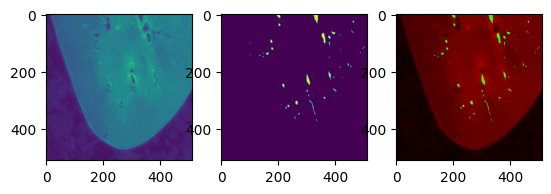

1
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
(512, 512, 3)


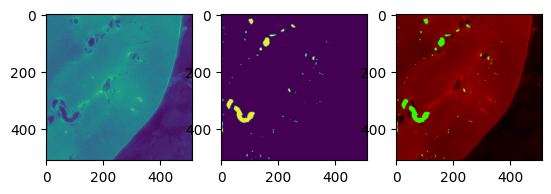

2
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
(512, 512, 3)


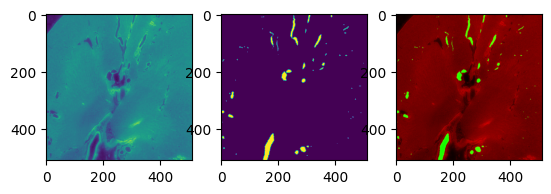

3
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
(512, 512, 3)


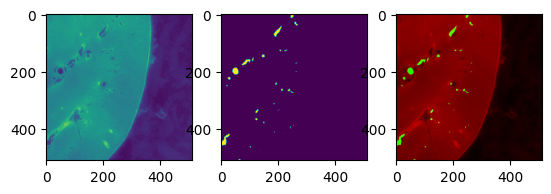

In [6]:
for idx, (image, mask) in enumerate(dataloader):
    print(idx)
    for batch in range(image.shape[0]):
        print(batch)
        print(image[batch].shape)
        print(mask[batch].shape)
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        print(image_mask.shape)
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(image[batch,0,:,:])
        plt.subplot(1,3,2)
        plt.imshow(mask[batch,0,:,:])
        plt.subplot(1,3,3)
        plt.imshow(image_mask)
        plt.show()

    break